In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# train_input 만 들어가도 되는 이유는 평균과 표준편차만 fit으로 알아내면 되기 때문이다.
ss.fit(train_input,train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier은 객체를 만들 때 2개의 매개변수를 지정한다.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


c:\Users\1724q\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
# 모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용한다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [7]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [8]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

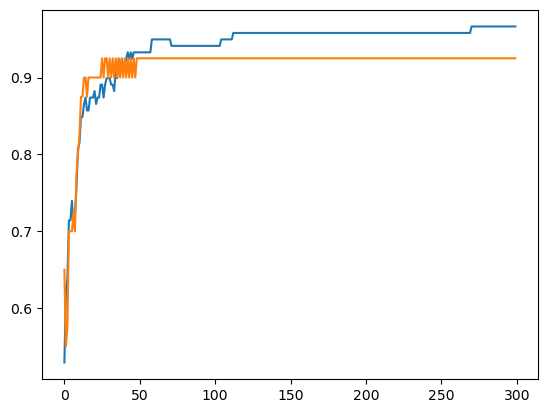

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
# tol은 무슨 역할을 하는가? Tolerance(허용 오차)로 조기 종료의 기준치 역할을 한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [1]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

NameError: name 'SGDClassifier' is not defined

In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>